This notebook will be used to develop tests and functions for making calls to the PVWatts API.

In [1]:
import requests
import json
import pandas as pd
import numpy as np

In [2]:
#import pvwatts_interface
def test_call_pvwatts():
    """This is a function to test the functionality of the call_pvwatts function"""
    #Test to be sure the function returns a dataframe. 
    #Test to make sure that the call always has the right number of columns, and that the columns contain labels 
    #that correspond to column titles we expect.
    
    #try calling pvwatts without a lattitude and logitude, and making sure the status code returned is 400
    
    #assert response.status_code == 200, "The data is not being returned from PVWatts correctly"
    #
    return 

In [19]:
def check_all_datasets(latitude, longitude, tilt, azimuth = 180):
    """This function checks all solar resource datasets, and generates a dataframe for each dataset.
    Returned parameters are collected and returned in a dictionary. The dictionary
    has keys that are the names of the solar resource datasets that actually returned data,
    and values that are the outputs from PVWatts (ie, the production predictions)"""
    #List of all of the available solar resource datasets from the PVWatts website.
    dataset_list = ['tmy2', 'tmy3', 'nsrdb', 'intl']
    solar_resource_dict = {}
    #Walk through the list, and check what is available at the lat and long provided.
    for counter, value in enumerate(dataset_list):
        #Call PVWatts API, and get response for specific tilt angle.
        parameters = {"format": 'JSON', "api_key": "2FGNWhrV7X5olr1eVu34xpySQLDytnRKKQtSOeI8", "system_capacity": 4, 
                      "module_type": 0, "losses": 14.08, "array_type": 0, "tilt": tilt, "azimuth": azimuth, 
                      "lat": latitude, "lon": longitude, "dataset": dataset_list[counter]}
        pvwatts_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = parameters)
        #Check the response from pvwatts to ensure that data was actually received
        #assert pvwatts_response.status_code == 200, "Error: " + str(pvwatts_response.status_code)
        #Convert the requests response into json
        pvwatts_response_json = pvwatts_response.json()
        #The response gives an empty list in the errors parameter if it was able to find the data.
        if pvwatts_response_json['errors'] == []:
            solar_resource_dict[str(dataset_list[counter])] = pvwatts_response_json['outputs']
            print("Added response data from: " + str(dataset_list[counter]) + " solar resource data.")
        else:
            print("The solar resource data from dataset " + str(dataset_list[counter]) + 
                  " at that location is not available.")
            print("We'll try again with other solar resource datasets!")
    print("We found prediction data from these solar resource datasets: " )
    print(solar_resource_dict.keys())
    return solar_resource_dict

In [20]:
check_all_datasets(64.825257, -147.619578, 45)

Added response data from: tmy2 solar resource data.
Added response data from: tmy3 solar resource data.
The solar resource data from dataset nsrdb at that location is not available.
We'll try again with other solar resource datasets!
The solar resource data from dataset intl at that location is not available.
We'll try again with other solar resource datasets!
We found prediction data from these solar resource datasets: 
dict_keys(['tmy2', 'tmy3'])


{'tmy2': {'ac_monthly': [75.29331970214844,
   212.30104064941406,
   450.2816467285156,
   572.53564453125,
   555.1434936523438,
   542.8285522460938,
   532.1309814453125,
   449.814697265625,
   330.38067626953125,
   217.23141479492188,
   105.97759246826172,
   37.46936798095703],
  'poa_monthly': [19.79026222229004,
   57.29265594482422,
   127.40550994873047,
   168.2696075439453,
   173.01815795898438,
   172.3505096435547,
   171.27613830566406,
   141.96417236328125,
   101.07383728027344,
   62.22165298461914,
   28.594524383544922,
   9.974127769470215],
  'solrad_monthly': [0.6383955478668213,
   2.046166181564331,
   4.1098551750183105,
   5.608986854553223,
   5.581231117248535,
   5.745017051696777,
   5.525036811828613,
   4.579489231109619,
   3.3691279888153076,
   2.007150173187256,
   0.9531508088111877,
   0.3217460513114929],
  'dc_monthly': [80.57490539550781,
   222.8466339111328,
   471.1372375488281,
   600.56298828125,
   582.278076171875,
   570.2353515625

In [27]:
def call_pvwatts(latitude, longitude, tilt, dataset, azimuth = 180):
    """This function calls the PVWatts API from NREL, and returns a dataframe of 
    expected power production from a cell with given position and tilt"""
    if not isinstance(latitude, (int, float)):
        raise TypeError("Passed latitude is not a number! Instead, it is: " + str(type(Testing_DataFrame)))
        
    #Call PVWatts API, and get response for specific tilt angle.
    parameters = {"format": 'JSON', "api_key": "2FGNWhrV7X5olr1eVu34xpySQLDytnRKKQtSOeI8", "system_capacity": 4, 
                  "module_type": 0, "losses": 14.08, "array_type": 0, "tilt": tilt, "azimuth": azimuth, 
                  "lat": latitude, "lon": longitude, "dataset": dataset}
    pvwatts_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = parameters)
    
    #Check the response from pvwatts to ensure that data was actually received
    assert pvwatts_response.status_code == 200, "Error: " + str(pvwatts_reponse.status_code)
    
    #Now we convert the response into a json format - 
    pvwatts_response_json = pvwatts_response.json()
    
    #Need a quick check to make sure that there was not a problem in the way PVWatts was called
    #If PVWatts detects an error, it throw it here. 
    if pvwatts_response_json['errors'] != []:
        print("An error occured when calling PVWatts. The error was: ")
        print(pvwatts_response_json['errors'])
        print("Please correct the error and call this function again.")
        raise ResponseError("Please correct the error and call the `call_pvwatts` function again")
    
    #Load the response to a dataframe
    dataframe = pd.DataFrame(pvwatts_response_json['outputs'])
    
    return pvwatts_response_json, dataframe

In [28]:
call_pvwatts(64.825257, -147.619578, 45, 'tmy3')

({'inputs': {'format': 'JSON',
   'system_capacity': '4',
   'module_type': '0',
   'losses': '14.08',
   'array_type': '0',
   'tilt': '45',
   'azimuth': '180',
   'lat': '64.825257',
   'lon': '-147.619578',
   'dataset': 'tmy3'},
  'errors': [],
  'warnings': [],
  'version': '1.0.1',
  'ssc_info': {'version': 45,
   'build': 'Linux 64 bit GNU/C++ Jul  7 2015 14:24:09'},
  'station_info': {'lat': 64.81700134277344,
   'lon': -147.85000610351562,
   'elev': 133.0,
   'tz': -9.0,
   'location': '702610',
   'city': '"FAIRBANKS INTL ARPT"',
   'state': 'AK',
   'solar_resource_file': '702610.csv',
   'distance': 13133},
  'outputs': {'ac_monthly': [62.9139404296875,
    200.2245330810547,
    432.4879150390625,
    602.9970092773438,
    589.9483032226562,
    548.9074096679688,
    521.2920532226562,
    471.678466796875,
    324.18096923828125,
    217.62522888183594,
    103.05846405029297,
    15.657976150512695],
   'poa_monthly': [16.747285842895508,
    54.60322189331055,
    1

In [4]:
def test_pvwatts_wrapper():
    return

In [ ]:
def pvwatts_wrapper(latitude, longitude, tilt):
    
    #Write such that tilt can be an int or a list.
    
    #If tilt is passed as "Best", then we'll call the tilt optimizer and return optimal tilt and use that.


### Maybe put together a set of functions that enable plotting of the various parameters of the pvwatts return parameters? 
I could see that there would be some interesting value to plotting solar resource over the course of the year, plotting the tilt vs. the output with both monthly and annual output, etc.

In [ ]:
def test_optimal_tilt_finder():
    
    

In [ ]:
def optimal_tilt_finder(latitude, longitude):
    
    

In [15]:
def test_plot_tilt_angle_annual():
    """This funtion tests the performance of the plot_tilt_angle_annual function to ensure proper output"""
    #This function mostly checks the handling of the plot function to incorrect inputs.
    
    
    return

In [12]:
import matplotlib.pyplot as plt
def plot_tilt_angle_annual(tilts, norm_annual_production_list):
    """This function takes tilt angles and an annual production list for a location and plots it"""
    plt.plot(tilts, norm_annual_production_list)
    plt.xlabel("Install Tilt Angle (Degrees)")
    plt.ylabel("Annual Energy Production (AC Ouput/DC Capacity)")
    plt.title("Annual Energy Generation vs Tilt")
    plt.show

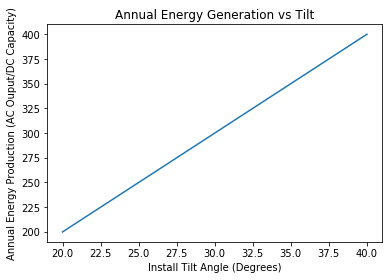

In [13]:
plot_tilt_angle_annual([20, 40], [200, 400])

In [17]:
def test_plot_tilt_angle_monthly():
    """This function tests the operation of the plot_tilt_angle_monthly function"""
    return

In [16]:
def plot_tilt_angle_monthly(tilts, pvwatts_response_list):
    """This function takes in a list of pvwatts responses and a list of tilts and plots monthly
    output of a panel with various tilts"""
    #Error handling should have tilts as a list of ints or floats, and the response list as a list of dataframes.
    #Also should check that the list of responses has as many elements as we have tilts.
    
    for i in range(len(tilts)):
        plt.plot(pvwatts_response_list[i]['ac_monthly'], label = tilts[i])
    plt.xlabel("Month")
    plt.ylabel("AC kWh Output")
    plt.title("Month and AC output with varying tilt angles from PVWatts")
    plt.legend()
    plt.show